In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Visualization about distribution

We can use bar-plot, box-plot, heatmaps to show the distribution of the discrete values. And we can use the histogrm and line-plot to show the distribution of the variable with continouous values. 

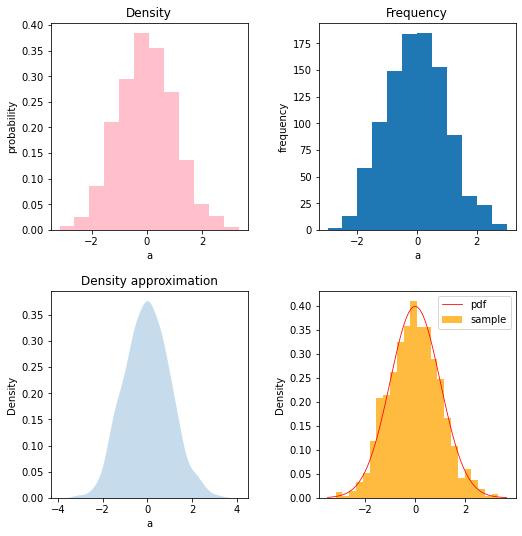

In [93]:
x = np.random.normal(0, 1, 1000)
data= pd.DataFrame({"a":x})

fig, axs = plt.subplots(2, 2,figsize=(8,8))
fig.tight_layout(pad=4.0)

# data.hist()

# plot the density on the left upper position
a = axs[0,0].hist(data.a, bins=12, density = True,color = 'pink', label="a")
axs[0,0].set_title("Density")
axs[0,0].set_xlabel('a')
axs[0,0].set_ylabel('probability')
# display(a)

# plot the frequency on the right upper position
axs[0,1].hist(data.a, bins=[-3, -2.5, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3], label= "a")
axs[0,1].set_title("Frequency")
axs[0,1].set_xlabel('a')
axs[0,1].set_ylabel('frequency')


# approximate the data distribution with line plot at the left lower distribution

sns.kdeplot(data["a"], fill=True, common_norm=False, palette="crest",
   linewidth=0, ax = axs[1,0])
axs[1,0].set_title("Density approximation")
axs[1,0].set_xlabel("a")

# sns.displot(x, kde=True)

# Use a normal distirbution to fit my data
axs[1,1] = sns.histplot(x, kde=False, stat='density', color = "orange", linewidth=0, label="sample")
x0, x1 = axs[1,1].get_xlim() 
x_pdf = np.linspace(x0, x1, 1000)
y_pdf = scipy.stats.norm.pdf(x_pdf)
# display(y_pdf)
axs[1,1].plot(x_pdf, y_pdf, 'r', lw = 0.8, label='pdf',)                                                   
axs[1,1].legend()

plt.show()

# More about data cleaning

In [3]:
# create a dataframe
r = pd.DataFrame({'a':["50-a","4-2","2-b","s-2"],'score1':['good','fair','bad','bad'],'score2':['bad','good','bad','bad'],'score3':['bad','fair','good','bad']})

r

,a,score1,score2,score3
0,50-a,good,bad,bad
1,4-2,fair,good,fair
2,2-b,bad,bad,good
3,s-2,bad,bad,bad


In [4]:
# map discrete labels to numeric values
r['score1_num'] = r['score1'].map( {'good': 2, 'fair': 1, 'bad':0} ).astype(int)
temp_dict = {'good': 2, 'fair': 1, 'bad':0}

# Directly replace labels with numeric values
r = r.replace({"score2":{'good': 2, 'fair': 1, 'bad':0}})

# Use logical orperators to select rows 
r["good"] = r['score1'].isin(["good","fair"]) | r['score3'].isin(["good","fair"])
r['not-good']  = r['score1'].isin(["bad","fair"]) & r['score3'].isin(["bad","fair"])
r

,a,score1,score2,score3,score1_num,good,not-good
0,50-a,good,0,bad,2,True,False
1,4-2,fair,2,fair,1,True,True
2,2-b,bad,0,good,0,True,False
3,s-2,bad,0,bad,0,False,True


In [5]:
# extract pattens as the integar follow by "-" and alphabets
r['Title'] = r['a'].str.extract('(\d+)-[a-z]+', expand=False)
r

,a,score1,score2,score3,score1_num,good,not-good,Title
0,50-a,good,0,bad,2,True,False,50
1,4-2,fair,2,fair,1,True,True,NaN
2,2-b,bad,0,good,0,True,False,2
3,s-2,bad,0,bad,0,False,True,NaN
